In [1]:
#Data Handling
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
ca_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [4]:
data[ca_cols] = data[ca_cols].astype(object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [6]:
# categorical columns
cp = pd.get_dummies(data['cp'], prefix= 'cp', dtype='int')
thal = pd.get_dummies(data['thal'], prefix = 'thal', dtype='int')
slope = pd.get_dummies(data['slope'], prefix = 'slope', dtype='int')

#merge dummy variables to main data frame
frames = [data, cp, thal, slope]
df = pd.concat(frames, axis = 1)

#Dropping the unnecessory variables
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [7]:
x = df.drop(['target'],axis=1)
y = df['target']

In [8]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modelsl
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

#Evalutaion
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score,
                recall_score, precision_score, f1_score, RocCurveDisplay, roc_curve, auc)
from sklearn.model_selection import GridSearchCV

In [9]:
seed = 13

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [11]:
encoder = StandardScaler()
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [12]:
x_train.shape, x_test.shape

((717, 21), (308, 21))

In [13]:
def evaluate(y_true, y_pred, prob):

  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  auc = roc_auc_score(y_true, prob[:, 1])

  results = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1, 'auc': auc}

  return results

In [14]:
def report(clf):
  #training evaluate
  y_train_pred = clf.predict(x_train)
  y_train_prob = clf.predict_proba(x_train)
  train_result = evaluate(y_train, y_train_pred, y_train_prob)
  print(train_result)

  #testing evaluate
  y_test_pred = clf.predict(x_test)
  y_test_prob = clf.predict_proba(x_test)
  test_result = evaluate(y_test, y_test_pred, y_test_prob)
  print(test_result)

In [ ]:
params = {'random_state': [seed], 'max_iter': list(range(100, 1100, 100))}

logistic = LogisticRegression()
grid_logistic = GridSearchCV(logistic, params, cv = 5, scoring = 'f1')
grid_logistic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'random_state': [13]},
             scoring='f1')

In [ ]:
print('Best parameters:', grid_logistic.best_params_)
print('Best score:', grid_logistic.best_score_)

Best parameters: {'max_iter': 100, 'random_state': 13}
Best score: 0.8447370748054404


In [ ]:
report(grid_logistic)

{'accuracy': 0.8619246861924686, 'recall': 0.907608695652174, 'precision': 0.8370927318295739, 'f1': 0.8709256844850065, 'auc': 0.9298539304846145}
{'accuracy': 0.8409090909090909, 'recall': 0.8734177215189873, 'precision': 0.8263473053892215, 'f1': 0.8492307692307692, 'auc': 0.9292827004219408}


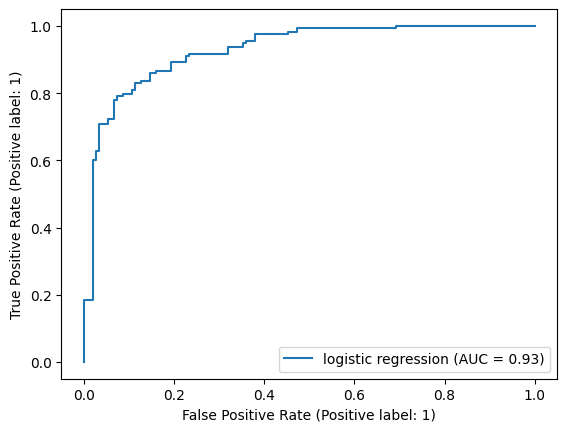

In [ ]:
RocCurveDisplay.from_estimator(grid_logistic, x_test, y_test, name = 'logistic regression')

In [ ]:
params = {'n_neighbors': list(range(5, 10, 2))}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, params, cv = 5, scoring = 'f1')
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9]}, scoring='f1')

In [ ]:
print('Best parameters:', grid_knn.best_params_)
print('Best score:', grid_knn.best_score_)

Best parameters: {'n_neighbors': 5}
Best score: 0.8540819409777909


In [ ]:
report(grid_knn)

{'accuracy': 0.9442119944211994, 'recall': 0.9239130434782609, 'precision': 0.9659090909090909, 'f1': 0.9444444444444444, 'auc': 0.9886866201569702}
{'accuracy': 0.8506493506493507, 'recall': 0.8291139240506329, 'precision': 0.8733333333333333, 'f1': 0.8506493506493507, 'auc': 0.9561392405063291}


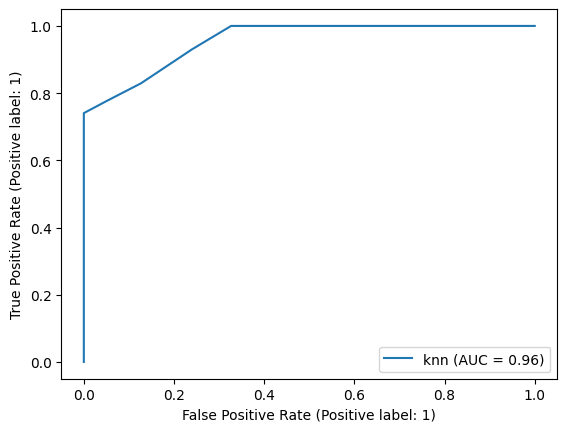

In [ ]:
RocCurveDisplay.from_estimator(grid_knn, x_test, y_test, name = 'knn')

In [ ]:
params = {'random_state': [seed], 'n_estimators': list(range(100, 500, 100)), 'min_samples_split': list(range(2, 10, 2)),
      'max_depth': [8, 10, 12, 14], 'min_samples_leaf': [1, 2, 3]}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, params, cv = 5, scoring = 'f1')
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12, 14],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [13]},
             scoring='f1')

In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200, 'random_state': 13}
Best score: 0.9784054865566734


In [ ]:
report(grid_rf)

{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1': 1.0, 'auc': 1.0}
{'accuracy': 0.9902597402597403, 'recall': 1.0, 'precision': 0.9811320754716981, 'f1': 0.9904761904761905, 'auc': 0.9986082995951416}


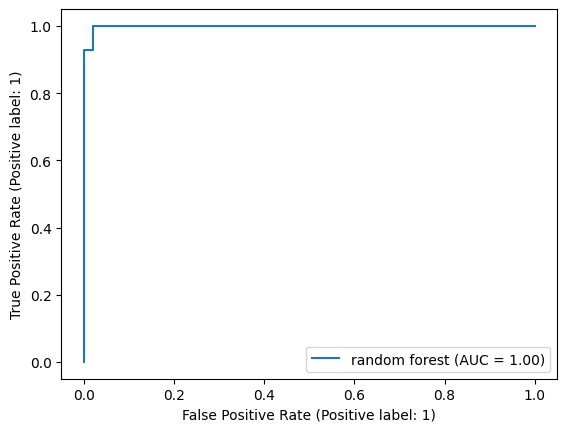

In [ ]:
RocCurveDisplay.from_estimator(grid_rf, x_test, y_test, name = 'random forest')

In [ ]:
params = {'probability': [True], 'random_state': [seed], 'C': [1, 10], 'max_iter': [1000], 'kernel': ['linear']}

svm = SVC()
grid_svm = GridSearchCV(svm, params, cv = 5, scoring = 'f1')
grid_svm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear'], 'max_iter': [1000],
                         'probability': [True], 'random_state': [13]},
             scoring='f1')

In [ ]:
print('Best parameters:', grid_svm.best_params_)
print('Best score:', grid_svm.best_score_)

Best parameters: {'C': 1, 'kernel': 'linear', 'max_iter': 1000, 'probability': True, 'random_state': 13}
Best score: 0.8565699671205262


In [ ]:
report(grid_svm)

{'accuracy': 0.8563458856345886, 'recall': 0.8804347826086957, 'precision': 0.8459530026109661, 'f1': 0.8628495339547271, 'auc': 0.9225115236078236}
{'accuracy': 0.8409090909090909, 'recall': 0.8417721518987342, 'precision': 0.8471337579617835, 'f1': 0.8444444444444446, 'auc': 0.9197046413502109}


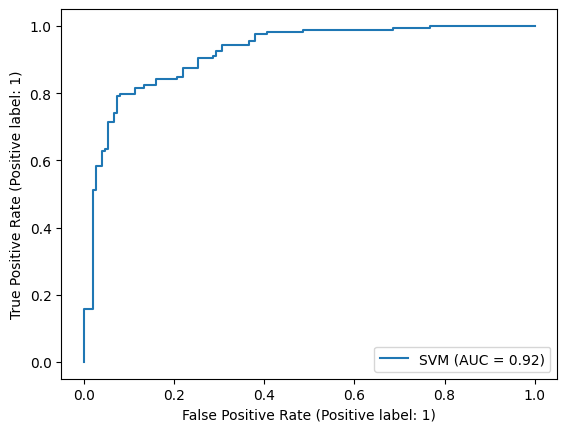

In [ ]:
RocCurveDisplay.from_estimator(grid_svm, x_test, y_test, name = 'SVM')

In [ ]:
params = {'max_depth': [3, 4, 5], 'random_state': [seed], 'min_samples_split': [5, 10], 'min_samples_leaf': [5, 10]}

tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, params, cv = 5, scoring = 'f1')
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10], 'random_state': [13]},
             scoring='f1')

In [ ]:
print('Best parameters:', grid_tree.best_params_)
print('Best score:', grid_tree.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 13}
Best score: 0.864834464432523


In [ ]:
report(grid_tree)

{'accuracy': 0.9274755927475593, 'recall': 0.9347826086956522, 'precision': 0.9247311827956989, 'f1': 0.9297297297297297, 'auc': 0.9835516070761181}
{'accuracy': 0.8701298701298701, 'recall': 0.8987341772151899, 'precision': 0.8554216867469879, 'f1': 0.8765432098765433, 'auc': 0.941097046413502}


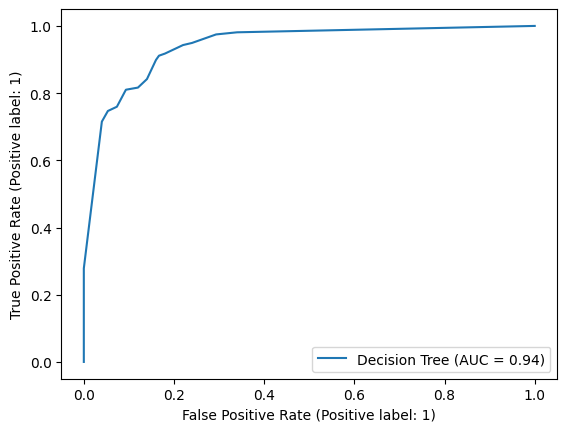

In [ ]:
RocCurveDisplay.from_estimator(grid_tree, x_test, y_test, name = 'Decision Tree')

In [ ]:
params = {'random_state': [seed], 'max_iter': [200, 300], 'learning_rate_init': [0.01, 0.001],
      'hidden_layer_sizes': [(16, 32)]}

mlp = MLPClassifier()
grid_mlp = GridSearchCV(mlp, params, cv = 5, scoring = 'f1')
grid_mlp.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(16, 32)],
                         'learning_rate_init': [0.01, 0.001],
                         'max_iter': [200, 300], 'random_state': [13]},
             scoring='f1')

In [ ]:
print('Best parameters:', grid_mlp.best_params_)
print('Best score:', grid_mlp.best_score_)

Best parameters: {'hidden_layer_sizes': (16, 32), 'learning_rate_init': 0.001, 'max_iter': 300, 'random_state': 13}
Best score: 0.9682772328688374


In [ ]:
report(grid_mlp)

{'accuracy': 0.99860529986053, 'recall': 1.0, 'precision': 0.997289972899729, 'f1': 0.9986431478968791, 'auc': 1.0}
{'accuracy': 0.9707792207792207, 'recall': 0.9620253164556962, 'precision': 0.9806451612903225, 'f1': 0.9712460063897763, 'auc': 0.9950632911392405}


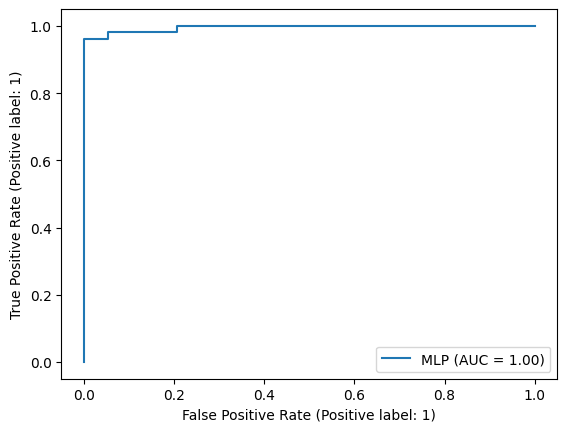

In [ ]:
RocCurveDisplay.from_estimator(grid_mlp, x_test, y_test, name = 'MLP')

In [ ]:
estimators = [('knn', KNeighborsClassifier(n_neighbors = 5)),
 ('svm', SVC(C = 1, max_iter = 1000, probability = True, random_state = seed))]
stacking_clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
stacking_clf.fit(x_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('svm',
                                SVC(C=1, max_iter=1000, probability=True,
                                    random_state=13))],
                   final_estimator=LogisticRegression())

In [ ]:
report(stacking_clf)

{'accuracy': 0.9456066945606695, 'recall': 0.9565217391304348, 'precision': 0.9386666666666666, 'f1': 0.9475100942126515, 'auc': 0.9918867571944686}
{'accuracy': 0.9058441558441559, 'recall': 0.9050632911392406, 'precision': 0.910828025477707, 'f1': 0.9079365079365079, 'auc': 0.9783122362869198}


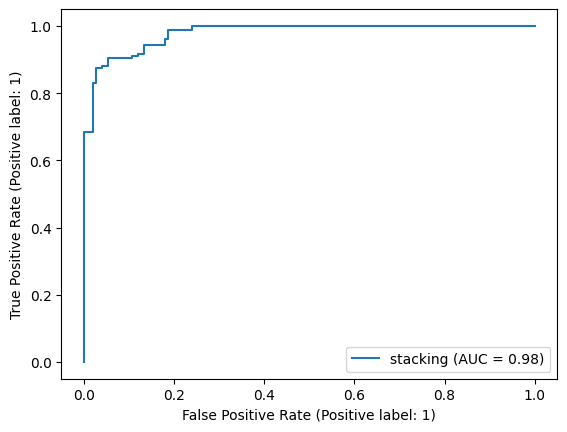

In [ ]:
RocCurveDisplay.from_estimator(stacking_clf, x_test, y_test, name = 'stacking')

In [ ]:
def report_ca(clf):
  #training evaluate
  y_train_pred = clf.predict(x_train_ca)
  y_train_prob = clf.predict_proba(x_train_ca)
  train_result = evaluate(y_train_ca, y_train_pred, y_train_prob)
  print(train_result)

  #testing evaluate
  y_test_pred = clf.predict(x_test_ca)
  y_test_prob = clf.predict_proba(x_test_ca)
  test_result = evaluate(y_test_ca, y_test_pred, y_test_prob)
  print(test_result)

In [ ]:
df_category = data.copy()
df_category[ca_cols] = df_category[ca_cols].astype('category')
df_category.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 57.4 KB


In [ ]:
x_ca = df_category.drop(['target'], axis=1)
y_ca = df_category['target']

In [ ]:
x_train_ca, x_test_ca, y_train_ca, y_test_ca = train_test_split(x_ca, y_ca, test_size = 0.3, random_state = 42, stratify = y_ca)

In [ ]:
params = {'max_depth': [3, 4, 5], 'n_estimators':[50, 100, 200], 'learning_rate': [0.1, 0.01],
      'min_child_samples': [5, 10, 15, 20], 'subsample': [0.8, 0.9, 1.0]}

lgbm = LGBMClassifier()
grid_lgbm = GridSearchCV(lgbm, params, cv = 5, scoring = 'f1')
grid_lgbm.fit(x_train_ca, y_train_ca)

串流輸出內容已截斷至最後 5000 行。
[LightGBM] [Info] Number of positive: 294, number of negative: 280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 574, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512195 -> initscore=0.048790
[LightGBM] [Info] Start training from score 0.048790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_child_samples': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1')

In [ ]:
print('Best parameters:', grid_lgbm.best_params_)
print('Best score:', grid_lgbm.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 15, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.9782322120557414


In [ ]:
report_ca(grid_lgbm)

{'accuracy': 0.99860529986053, 'recall': 1.0, 'precision': 0.997289972899729, 'f1': 0.9986431478968791, 'auc': 1.0}
{'accuracy': 0.9805194805194806, 'recall': 0.9810126582278481, 'precision': 0.9810126582278481, 'f1': 0.9810126582278481, 'auc': 0.9948101265822784}


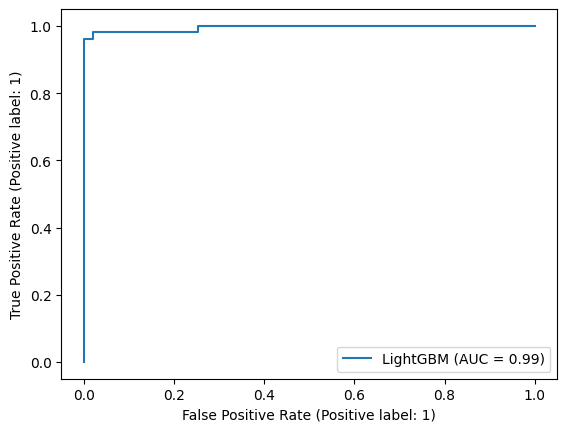

In [ ]:
RocCurveDisplay.from_estimator(grid_lgbm, x_test_ca, y_test_ca, name = 'LightGBM')

In [ ]:
lgbm_model = grid_lgbm.best_estimator_

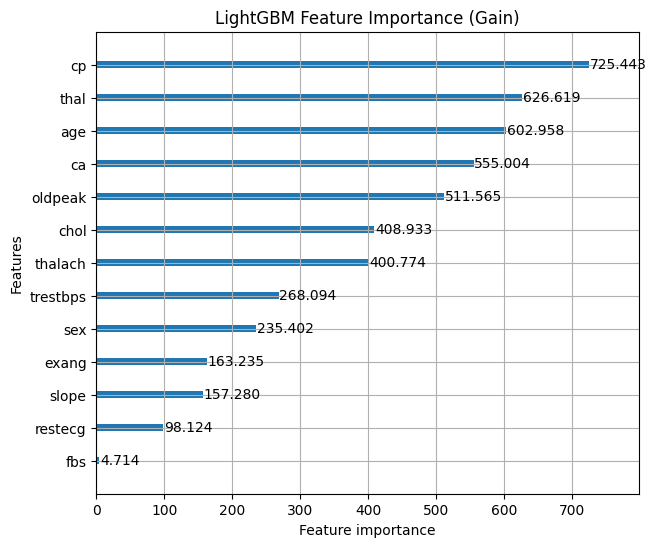

In [ ]:
lgb.plot_importance(lgbm_model, importance_type = "gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


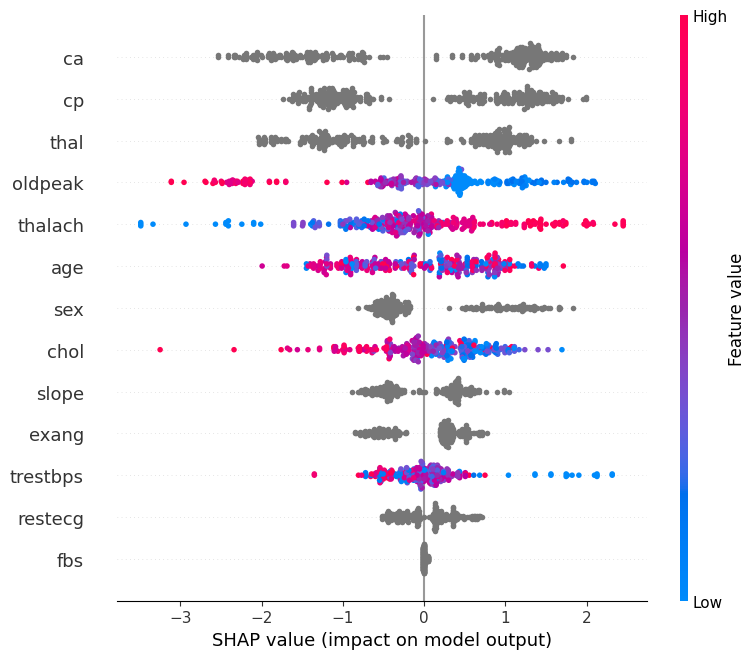

In [ ]:
import shap

shap_values = shap.TreeExplainer(lgbm_model).shap_values(x_test_ca)
shap.summary_plot(shap_values, x_test_ca)